In [50]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import pickle

plt.style.use('classic')

matplotlib.rcParams['font.family']='sans-serif'
matplotlib.rcParams['font.sans-serif']=['DejaVu Serif']
matplotlib.rcParams['mathtext.fontset'] = 'dejavuserif'

In [51]:
def load_data_dim_d(d, max_res, path = 'Compressed_results/'):
    """
    Load data from all 5 methods for a given diamension.
    
    Parameters
    ----------
    d : int
        Dimension of the problem.
    max_res : int or list or np.array
        Maximum resolution of the grids.

    Returns
    -------
    data : list
        List of the data from all 5 methods.
    """


    
    if type(max_res) == int:
        hyper_data_save = []
        lhs_data_save = []
        rand_data_save = []
        RegGrid_data_save = []
        rsa_data_save = []

        grid_rand_data_saved_combined = []
        true_hyper_data_saved_combined = []
        
        for i in range(2, max_res+1):
            if d>3:
                with open(path+'data_files_d_{}_res_{}.p'.format(d, i), 'rb') as f:
                    data = pickle.load(f)

                hyper_data_save.append(data[3])
                lhs_data_save.append(data[2])
                rand_data_save.append(data[4])
                RegGrid_data_save.append(data[5])
                rsa_data_save.append(data[6])
                grid_rand_data_saved_combined.append(data[1])
                true_hyper_data_saved_combined.append(data[0])
            else:
                
                with open(path+'grid_rand_d_{}_res_{}_combined.p'.format(d,i), 'rb') as f:
                    grid_rand_data_combined = pickle.load(f)
                grid_rand_data_saved_combined.append(grid_rand_data_combined)

                with open(path+'true_hyper_d_{}_res_{}_combined.p'.format(d,i), 'rb') as f:
                    true_hyper_data_combined = pickle.load(f)
                true_hyper_data_saved_combined.append(true_hyper_data_combined)

                with open(path+'hyp_d_{}_res_{}_combined.p'.format(d,i), 'rb') as f:
                    hyper_data = pickle.load(f)
                hyper_data_save.append(hyper_data)
                
                with open(path+'lhs_d_{}_res_{}_combined.p'.format(d,i), 'rb') as f:
                    lhs_data = pickle.load(f)
                lhs_data_save.append(lhs_data)
                
                with open(path+'ran_d_{}_res_{}_combined.p'.format(d,i), 'rb') as f:
                    rand_data = pickle.load(f)
                rand_data_save.append(rand_data)

                with open(path+'rsa_d_{}_res_{}_combined.p'.format(d,i), 'rb') as f:
                    rsa_data = pickle.load(f)
                rsa_data_save.append(rsa_data)

                with open(path+'reg_d_{}_res_{}_combined.p'.format(d,i), 'rb') as f:
                    reg_data = pickle.load(f)
                RegGrid_data_save.append(reg_data)

            
        return hyper_data_save, lhs_data_save, rand_data_save, RegGrid_data_save, rsa_data_save, \
        grid_rand_data_saved_combined, true_hyper_data_saved_combined

In [52]:
def analyse_data(data,N_batch, max_res, d, mode=1):
    """
    Analyse the data from all 5 methods.

    Parameters
    ----------
    data : list
        List of the data from all 5 methods.
    N_batch : int
        Number of batches.
    number_of_girds : int
        Number of grids.
    d : int
        Dimension of the grid.

    Returns
    -------
    mean: list
        List of the mean of the minimum scaled loss from all 5 methods.
    std: list
        List of the standard deviation of the minimum scaled loss from all 5 methods.
    """
    if type(max_res) == list or type(max_res) == np.ndarray:
        max_res = len(max_res)

    mean_hyper = []
    mean_lhs = []
    mean_rand = []
    mean_RegGrid = []
    mean_rsa = []

    mean_grid_rand = []
    mean_true_hyper = []

    std_hyper = []
    std_lhs = []
    std_rand = []
    std_RegGrid = []
    std_rsa = []

    std_grid_rand = []
    std_true_hyper = []

    min_loss_hyper_save = []
    min_loss_lhs_save = []
    min_loss_rand_save = []
    min_loss_RegGrid_save = []
    min_loss_rsa_save = []

    min_loss_grid_rand_save = []
    min_loss_true_hyper_save = []

    min_all = []
    mean_resilution_rsa = []
    std_resilution_rsa = []

    mean_resolution_true_hyper = []
    std_resolution_true_hyper = []
    
    for i in range(max_res-1):
        min_loss_hyper = []
        min_loss_lhs = []
        min_loss_rand = []
        min_loss_RegGrid = []
        min_loss_rsa = []
        
        min_loss_grid_rand = []
        min_loss_true_hyper = []
        

        resilution_rsa = []
        resolution_true_hyper = []
        for j in range(N_batch):
            min_loss_hyper.append  ((data[0][i])[j, -1])
            min_loss_lhs.append    ((data[1][i])[j, -1])
            min_loss_rand.append   ((data[2][i])[j, -1])
            min_loss_RegGrid.append((data[3][i])[j, -1])
            min_loss_rsa.append    ((data[4][i])[j, -1])
            min_loss_grid_rand.append((data[5][i])[j, -1])
            min_loss_true_hyper.append((data[6][i])[j, -1])
            
            resilution_rsa.append((data[6][i])[j, -1])
            resolution_true_hyper.append((data[6][i])[j, -1])
                                                      
        if mode==1:
            min_temp = np.vstack((min_loss_rand, min_loss_RegGrid, min_loss_true_hyper))
        if mode==2:
            min_temp = np.vstack((min_loss_hyper, min_loss_lhs, min_loss_rand, min_loss_RegGrid, min_loss_rsa, min_loss_grid_rand, min_loss_true_hyper))
        
        min_temp = np.min(min_temp, axis=0)
        min_all.append(min_temp)



        mean_resilution_rsa.append(np.mean(resilution_rsa))
        std_resilution_rsa.append(np.std(resilution_rsa))

        mean_resolution_true_hyper.append(np.mean(resolution_true_hyper))
        std_resolution_true_hyper.append(np.std(resolution_true_hyper))
        
        min_loss_hyper_save.append(min_loss_hyper)
        min_loss_lhs_save.append(min_loss_lhs)
        min_loss_rand_save.append(min_loss_rand)
        min_loss_RegGrid_save.append(min_loss_RegGrid)
        min_loss_rsa_save.append(min_loss_rsa)

        min_loss_grid_rand_save.append(min_loss_grid_rand)
        min_loss_true_hyper_save.append(min_loss_true_hyper)

    min_all = np.min(np.array(min_all), axis=0)

    min_loss_hyper_save = np.array(min_loss_hyper_save)/min_all
    min_loss_lhs_save = np.array(min_loss_lhs_save)/min_all
    min_loss_rand_save = np.array(min_loss_rand_save)/min_all
    min_loss_RegGrid_save = np.array(min_loss_RegGrid_save)/min_all
    min_loss_rsa_save = np.array(min_loss_rsa_save)/min_all

    min_loss_grid_rand_save = np.array(min_loss_grid_rand_save)/min_all
    min_loss_true_hyper_save = np.array(min_loss_true_hyper_save)/min_all

    for i in range(max_res-1):

        if mode==1:
            for j in range(len(min_loss_lhs_save[i])):
                l = [min_loss_hyper_save[i][j]*100, min_loss_lhs_save[i][j]*100, min_loss_rand_save[i][j], min_loss_RegGrid_save[i][j],  \
                    min_loss_rsa_save[i][j]*100, min_loss_grid_rand_save[i][j]*100, min_loss_true_hyper_save[i][j]]
                wins[l.index(min(l))] +=1

        if mode==2:
            for j in range(len(min_loss_lhs_save[i])):
                l = [min_loss_hyper_save[i][j], min_loss_lhs_save[i][j], min_loss_rand_save[i][j], min_loss_RegGrid_save[i][j],  \
                    min_loss_rsa_save[i][j], min_loss_grid_rand_save[i][j], min_loss_true_hyper_save[i][j]]
                wins[l.index(min(l))] +=1
      
        mean_hyper.append(np.mean(min_loss_hyper_save[i]))
        mean_lhs.append(np.mean(min_loss_lhs_save[i]))
        mean_rand.append(np.mean(min_loss_rand_save[i]))
        mean_RegGrid.append(np.mean(min_loss_RegGrid_save[i]))
        mean_rsa.append(np.mean(min_loss_rsa_save[i]))

        mean_grid_rand.append(np.mean(min_loss_grid_rand_save[i]))
        mean_true_hyper.append(np.mean(min_loss_true_hyper_save[i]))


        hyper_const = (mean_hyper[-1] - 1)/(mean_RegGrid[-1] - 1)
        lhs_const = (mean_lhs[-1] - 1)/(mean_RegGrid[-1] - 1)
        rand_const = (mean_rand[-1] - 1)/(mean_RegGrid[-1] - 1)
        RegGrid_const = (mean_RegGrid[-1] - 1)/(mean_RegGrid[-1] - 1)
        rsa_const = (mean_rsa[-1] - 1)/(mean_RegGrid[-1] - 1)

        grid_rand_const = (mean_grid_rand[-1] - 1)/(mean_RegGrid[-1] - 1)
        true_hyper_const = (mean_true_hyper[-1] - 1)/(mean_RegGrid[-1] - 1)


        std_hyper.append(hyper_const*np.sqrt((np.std(min_loss_hyper_save[i])/(mean_hyper[-1]-1))**2 + (np.std(min_loss_RegGrid_save[i])/(mean_RegGrid[-1]-1))**2)/np.sqrt(N_batch))
        std_lhs.append(lhs_const*np.sqrt((np.std(min_loss_lhs_save[i])/(mean_lhs[-1]-1))**2 + (np.std(min_loss_RegGrid_save[i])/(mean_RegGrid[-1]-1))**2)/np.sqrt(N_batch))
        std_rand.append(rand_const*np.sqrt((np.std(min_loss_rand_save[i])/(mean_rand[-1]-1))**2 + (np.std(min_loss_RegGrid_save[i])/(mean_RegGrid[-1]-1))**2)/np.sqrt(N_batch))
        std_grid_rand.append(grid_rand_const*np.sqrt((np.std(min_loss_grid_rand_save[i])/(mean_grid_rand[-1]-1))**2 + (np.std(min_loss_RegGrid_save[i])/(mean_RegGrid[-1]-1))**2)/np.sqrt(N_batch))
        std_true_hyper.append(true_hyper_const*np.sqrt((np.std(min_loss_true_hyper_save[i])/(mean_true_hyper[-1]-1))**2 + (np.std(min_loss_RegGrid_save[i])/(mean_RegGrid[-1]-1))**2)/np.sqrt(N_batch))

        
        std_RegGrid.append(0)
        std_rsa.append(rsa_const*np.sqrt((np.std(min_loss_rsa_save[i])/(mean_rsa[-1]-1))**2 + (np.std(min_loss_RegGrid_save[i])/(mean_RegGrid[-1]-1))**2)/np.sqrt(N_batch))

        
        
    mean_hyper = np.array(mean_hyper)
    mean_lhs = np.array(mean_lhs)
    mean_rand = np.array(mean_rand)
    mean_RegGrid = np.array(mean_RegGrid)
    mean_rsa = np.array(mean_rsa)

    mean_grid_rand = np.array(mean_grid_rand)
    mean_true_hyper = np.array(mean_true_hyper)
    
    mean_hyper = (mean_hyper - mean_RegGrid/mean_RegGrid)/(mean_RegGrid - mean_RegGrid/mean_RegGrid)
    mean_lhs = (mean_lhs - mean_RegGrid/mean_RegGrid)/(mean_RegGrid - mean_RegGrid/mean_RegGrid)
    mean_rand = (mean_rand - mean_RegGrid/mean_RegGrid)/(mean_RegGrid - mean_RegGrid/mean_RegGrid)
    mean_rsa = (mean_rsa - mean_RegGrid/mean_RegGrid)/(mean_RegGrid - mean_RegGrid/mean_RegGrid)    
    
    mean_grid_rand= (mean_grid_rand - mean_RegGrid/mean_RegGrid)/(mean_RegGrid - mean_RegGrid/mean_RegGrid)    
    mean_true_hyper = (mean_true_hyper - mean_RegGrid/mean_RegGrid)/(mean_RegGrid - mean_RegGrid/mean_RegGrid)  

    mean_RegGrid = (mean_RegGrid - mean_RegGrid/mean_RegGrid)/(mean_RegGrid - mean_RegGrid/mean_RegGrid)
    
    std_hyper = np.array(std_hyper)
    std_lhs = np.array(std_lhs)
    std_rand = np.array(std_rand)
    std_RegGrid = np.array(std_RegGrid)
    std_rsa = np.array(std_rsa)

    std_grid_rand = np.array(std_grid_rand)
    std_true_hyper = np.array(std_true_hyper)

    return [mean_hyper, mean_lhs, mean_rand, mean_RegGrid, mean_rsa, mean_grid_rand, mean_true_hyper], \
    [std_hyper, std_lhs, std_rand, std_RegGrid, std_rsa, std_grid_rand, std_true_hyper], \
    [mean_resilution_rsa, std_resilution_rsa], [mean_resolution_true_hyper, std_resolution_true_hyper],


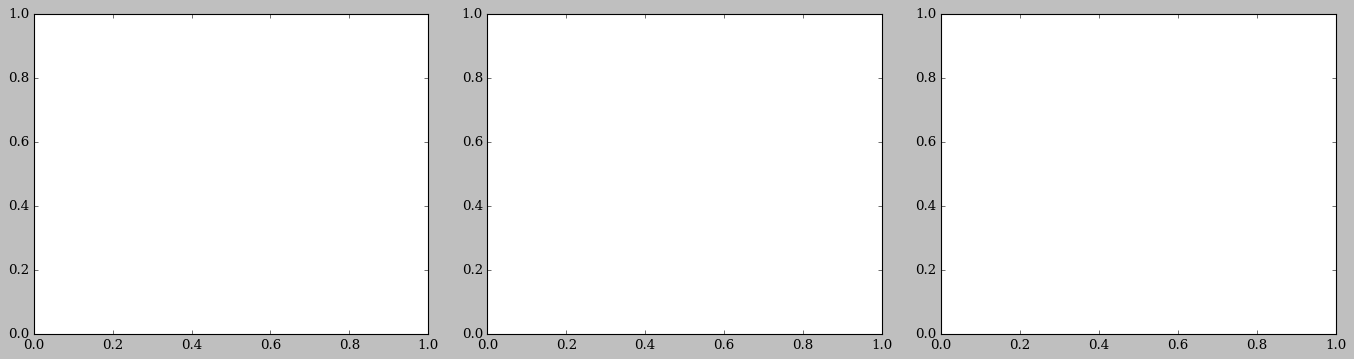

In [53]:
fig, ax = plt.subplots(1, 3, figsize=(7*3, 5))
plt.subplots_adjust(wspace=0.15)
width_grid=0.2

In [54]:
wins_grid=0
wins_random=0
wins_hyperuniform=0

wins = [0, 0, 0, 0, 0, 0, 0]

data = load_data_dim_d(2, 5)
mean,std,rsa_res, true_hyper_res = analyse_data(data,248,5,2)

In [55]:
X =np.arange(2,6)**2

true_hyper_res = [3.920152091254753, 9.09765625, 16.1328125, 25.15234375]
true_hyper_err = [0.047477696104397296, 0.062200088482250206, 0.06613039228449337, 0.08293950386466875]

ax[0].errorbar(X, mean[3], yerr=std[3], label='Grid', marker='o', markersize=10, linestyle='-', color='green', linewidth=2, elinewidth=2, capthick=2)
ax[0].fill_between(X, mean[3]-std[3], mean[3]+std[3], alpha=0.03, color='green')
ax[0].errorbar(X, mean[2], yerr=std[2], label='Random', marker='^', markersize=10, linestyle='-', color='blue', linewidth=2, elinewidth=2, capthick=2)
ax[0].fill_between(X, mean[2]-std[2], mean[2]+std[2], alpha=0.03, color='blue')
ax[0].errorbar(true_hyper_res, mean[6], yerr=std[6], xerr=true_hyper_err, label='Hyperuniform', marker='s',  markersize=10, linestyle='-', color='red', linewidth=2, elinewidth=2, capthick=2)
ax[0].fill_between(true_hyper_res, mean[6]-std[6], mean[6]+std[6], alpha=0.03, color='red')

ax[0].set_ylabel('(Scaled loss-1) relative \n to grid search', fontsize = 20)

maks_power = int(np.log10(20**2))

values_upper = []
ticks_upper = []

ax[0].set_xscale('log')
ax[0].set(ylim=(0.55, 1.05), xlim=(3, 30))

for i in range(1, maks_power+1):
  if 10**i >= 3 and 10**i <= 30:
    values_upper.append(10**i)
    ticks_upper.append('$10^{}$'.format(i))
      
ax0 = ax[0].twiny()
ax0.set_xlim(3, 35)
ax0.set_xscale('log')
ax0.set_xticks(values_upper, ticks_upper, fontsize=20)
ax[0].set_xticks([i**2 for i in range(2, 6)], [r'${}^{}$'.format(i, 2) for i in range(2, 6)], fontsize=20)
ax[0].tick_params(labelsize=20)

ax0.set_axisbelow(True)
ax[0].set_axisbelow(True)
ax[0].set_facecolor('whitesmoke')

In [56]:
print("Data used in the manuscript. It refers to the comparison of only grid, random, and hyperuniform.")
print("")
print("2d-how-much-better")
print("Hyperuniform-than-random", sum([(mean[2][i]-mean[6][i])/mean[2][i] for i in range(len(mean[6]))])*100/len(mean[6]))
print("Hyperuniform-than-grid", sum([(mean[3][i]-mean[6][i])/mean[3][i] for i in range(len(mean[6]))])*100/len(mean[6]))

wins_grid += wins[3]
wins_random += wins[2]
wins_hyperuniform += wins[6]

Data used in the manuscript. It refers to the comparison of only grid, random, and hyperuniform.

2d-how-much-better
Hyperuniform-than-random 2.816494353703304
Hyperuniform-than-grid 28.12961985638672


In [57]:
wins = [0, 0, 0, 0, 0, 0, 0]

data = load_data_dim_d(2, 5)
mean,std,rsa_res, true_hyper_res = analyse_data(data,248,5,2, mode=2)

In [58]:
#Now the data used in the manuscript is displayed
print("Data used in Table III. It refers to the comparison of all considered strategies")

print("")
print("Data for 2d - fraction of wins")
print("Grid", wins[3]/sum(wins))
print("Random", wins[2]/sum(wins))
print("RSA", wins[4]/sum(wins))
print("Quasiperiodic", wins[0]/sum(wins))
print("LHS", wins[1]/sum(wins))
print("Gridrandom", wins[5]/sum(wins))
print("Hyperuniform", wins[6]/sum(wins))

print("")
print("Data for 2d - mean loss")
print("Grid", sum(mean[3])/len(mean[3]))
print("Random", sum(mean[2])/len(mean[2]))
print("RSA", sum(mean[4])/len(mean[4]))
print("Quasiperiodic", sum(mean[0])/len(mean[0]))
print("LHS", sum(mean[1])/len(mean[1]))
print("Gridrandom", sum(mean[5])/len(mean[5]))
print("Hyperuniform", sum(mean[6])/len(mean[6]))

Data used in Table III. It refers to the comparison of all considered strategies

Data for 2d - fraction of wins
Grid 0.08971774193548387
Random 0.1502016129032258
RSA 0.1663306451612903
Quasiperiodic 0.13004032258064516
LHS 0.17338709677419356
Gridrandom 0.14012096774193547
Hyperuniform 0.1502016129032258

Data for 2d - mean loss
Grid 1.0
Random 0.7741310315466077
RSA 0.6894038796196571
Quasiperiodic 0.8313866971966816
LHS 0.7005585231747126
Gridrandom 0.7558534274793173
Hyperuniform 0.7548389904844902


In [59]:
wins = [0, 0, 0, 0, 0, 0, 0]

data = load_data_dim_d(3, 5)
mean,std,rsa_res, true_hyper_res = analyse_data(data,248,5,3)

In [60]:
X =np.arange(2,6)**3

true_hyper_res = [7.947735191637631, 27.020905923344948, 63.89895470383275, 125.19163763066202]
true_hyper_err = [0.07455234432254486, 0.11607240143103202, 0.15222614422797195, 0.19182825422712468]

ax[1].errorbar(X, mean[3], yerr=std[3], label='Grid', marker='o', markersize=10, linestyle='-', color='green', linewidth=2, elinewidth=2, capthick=2)
ax[1].fill_between(X, mean[3]-std[3], mean[3]+std[3], alpha=0.03, color='green')
ax[1].errorbar(X, mean[2], yerr=std[2], label='Random', marker='^', markersize=10, linestyle='-', color='blue', linewidth=2, elinewidth=2, capthick=2)
ax[1].fill_between(X, mean[2]-std[2], mean[2]+std[2], alpha=0.03, color='blue')
ax[1].errorbar(true_hyper_res, mean[6], yerr=std[6], xerr=true_hyper_err, label='Hyperuniform', marker='s',  markersize=10, linestyle='-', color='red', linewidth=2, elinewidth=2, capthick=2)
ax[1].fill_between(true_hyper_res, mean[6]-std[6], mean[6]+std[6], alpha=0.03, color='red')

handles, labels = ax[1].get_legend_handles_labels()
handles = [x[0] for x in handles]

l = ax[1].legend(handles, labels, fontsize=20, markerscale=1.3, loc = (1.5, 0.55))

for line in l.get_lines():
   line.set_linewidth(2)

maks_power = int(np.log10(5**3))

values_upper = []
ticks_upper = []

ax[1].set_xscale('log')
ax[1].set(ylim=(0.5, 1.05), xlim=(6, 150))

for i in range(1, maks_power+1):
  if 10**i >= 6 and 10**i <= 150:
    values_upper.append(10**i)
    ticks_upper.append('$10^{}$'.format(i))


ax1 = ax[1].twiny()
ax1.set_xlim(6, 150)
ax1.set_xscale('log')
ax1.set_xticks(values_upper, ticks_upper, fontsize=20)
ax[1].set_xticks([i**3 for i in range(2, 6)], [r'${}^{}$'.format(i, 3) for i in range(2, 6)], fontsize=20)
ax[1].tick_params(labelsize=20)


ax1.set_axisbelow(True)
ax[1].set_axisbelow(True)
ax[1].set_facecolor('whitesmoke')

ax[1].set_zorder(1)
ax1.set_zorder(1)

In [61]:
print("Data used in the manuscript. It refers to the comparison of only grid, random, and hyperuniform.")
print("")
print("3d-how-much-better")
print("Hyperuniform-than-random", sum([(mean[2][i]-mean[6][i])/mean[2][i] for i in range(len(mean[6]))])*100/len(mean[6]))
print("Hyperuniform-than-grid", sum([(mean[3][i]-mean[6][i])/mean[3][i] for i in range(len(mean[6]))])*100/len(mean[6]))

wins_grid += wins[3]
wins_random += wins[2]
wins_hyperuniform += wins[6]

Data used in the manuscript. It refers to the comparison of only grid, random, and hyperuniform.

3d-how-much-better
Hyperuniform-than-random 0.790247458043625
Hyperuniform-than-grid 34.855049619883005


In [62]:
wins = [0, 0, 0, 0, 0, 0, 0]

data = load_data_dim_d(3, 5)
mean,std,rsa_res, true_hyper_res = analyse_data(data,248,5,3,mode=2)

In [63]:
#Now the data used in the manuscript is displayed
print("Data used in Table III. It refers to the comparison of all considered strategies")

print("")
print("Data for 3d - fraction of wins")
print("Grid", wins[3]/sum(wins))
print("Random", wins[2]/sum(wins))
print("RSA", wins[4]/sum(wins))
print("Quasiperiodic", wins[0]/sum(wins))
print("LHS", wins[1]/sum(wins))
print("Gridrandom", wins[5]/sum(wins))
print("Hyperuniform", wins[6]/sum(wins))

print("")
print("Data for 3d - mean loss")
print("Grid", sum(mean[3])/len(mean[3]))
print("Random", sum(mean[2])/len(mean[2]))
print("RSA", sum(mean[4])/len(mean[4]))
print("Quasiperiodic", sum(mean[0])/len(mean[0]))
print("LHS", sum(mean[1])/len(mean[1]))
print("Gridrandom", sum(mean[5])/len(mean[5]))
print("Hyperuniform", sum(mean[6])/len(mean[6]))

Data used in Table III. It refers to the comparison of all considered strategies

Data for 3d - fraction of wins
Grid 0.09274193548387097
Random 0.14516129032258066
RSA 0.15221774193548387
Quasiperiodic 0.1350806451612903
LHS 0.1774193548387097
Gridrandom 0.1381048387096774
Hyperuniform 0.1592741935483871

Data for 3d - mean loss
Grid 1.0
Random 0.7177901088557739
RSA 0.6874650625198365
Quasiperiodic 0.7174893871750045
LHS 0.6726733027737697
Gridrandom 0.7107734032798052
Hyperuniform 0.7152063456094042


In [64]:
wins = [0, 0, 0, 0, 0, 0, 0]

data = load_data_dim_d(4, 4)
mean,std,rsa_res, true_hyper_res = analyse_data(data,247,4,4)

In [65]:
X = np.array([2**4, 3**4, 4**4])

true_hyper_res = [15.654618473895582, 80.53413654618474, 253.97991967871485]
true_hyper_err = [0.11483279981230057, 0.22621180629758922, 0.3440803694787067]

ax[2].errorbar(X, mean[3], yerr=std[3], label='Grid', marker='o', markersize=10, linestyle='-', color='green', linewidth=2, elinewidth=2, capthick=2)
ax[2].fill_between(X, mean[3]-std[3], mean[3]+std[3], alpha=0.03, color='green')
ax[2].errorbar(X, mean[2], yerr=std[2], label='Random', marker='^', markersize=10, linestyle='-', color='blue', linewidth=2, elinewidth=2, capthick=2)
ax[2].fill_between(X, mean[2]-std[2], mean[2]+std[2], alpha=0.03, color='blue')
ax[2].errorbar(true_hyper_res, mean[6], yerr=std[6], xerr=true_hyper_err, label='Hyperuniform', marker='s',  markersize=10, linestyle='-', color='red', linewidth=2, elinewidth=2, capthick=2)
ax[2].fill_between(true_hyper_res, mean[6]-std[6], mean[6]+std[6], alpha=0.03, color='red')

maks_power = int(np.log10(5**4))

values_upper = []
ticks_upper = []

ax[2].set_xscale('log')
ax[2].set(ylim=(0.2, 1.05), xlim=(14, 280))

for i in range(1, maks_power+1):
  if 10**i >= 14 and 10**i <= 700:
    values_upper.append(10**i)
    ticks_upper.append('$10^{}$'.format(i))

ax2 = ax[2].twiny()
#ax2.set_xlim(14, 700)
ax2.set_xlim(14, 280)
ax2.set_xscale('log')
ax2.set_xticks(values_upper, ticks_upper, fontsize=20)
ax[2].set_xticks([i**4 for i in range(2, 5)], [r'${}^{}$'.format(i, 4) for i in range(2, 5)], fontsize=20)
ax[2].tick_params(labelsize=20)

ax2.set_axisbelow(True)
ax[2].set_axisbelow(True)
ax[2].set_facecolor('whitesmoke')

In [66]:
print("Data used in the manuscript. It refers to the comparison of only grid, random, and hyperuniform.")
print("")
print("4d-how-much-better")
print("Hyperuniform-than-random", sum([(mean[2][i]-mean[6][i])/mean[2][i] for i in range(len(mean[6]))])*100/len(mean[6]))
print("Hyperuniform-than-grid", sum([(mean[3][i]-mean[6][i])/mean[3][i] for i in range(len(mean[6]))])*100/len(mean[6]))

wins_grid += wins[3]
wins_random += wins[2]
wins_hyperuniform += wins[6]

Data used in the manuscript. It refers to the comparison of only grid, random, and hyperuniform.

4d-how-much-better
Hyperuniform-than-random 6.5558006889285485
Hyperuniform-than-grid 58.95105261686977


In [67]:
wins = [0, 0, 0, 0, 0, 0, 0]

data = load_data_dim_d(4, 4)
mean,std,rsa_res, true_hyper_res = analyse_data(data,247,4,4,mode=2)

In [68]:
#Now the data used in the manuscript is displayed
print("Data used in Table III. It refers to the comparison of all considered strategies")

print("")
print("Data for 4d - fraction of wins")
print("Grid", wins[3]/sum(wins))
print("Random", wins[2]/sum(wins))
print("RSA", wins[4]/sum(wins))
print("Quasiperiodic", wins[0]/sum(wins))
print("LHS", wins[1]/sum(wins))
print("Gridrandom", wins[5]/sum(wins))
print("Hyperuniform", wins[6]/sum(wins))

print("")
print("Data for 4d - mean loss")
print("Grid", sum(mean[3])/len(mean[3]))
print("Random", sum(mean[2])/len(mean[2]))
print("RSA", sum(mean[4])/len(mean[4]))
print("Quasiperiodic", sum(mean[0])/len(mean[0]))
print("LHS", sum(mean[1])/len(mean[1]))
print("Gridrandom", sum(mean[5])/len(mean[5]))
print("Hyperuniform", sum(mean[6])/len(mean[6]))

Data used in Table III. It refers to the comparison of all considered strategies

Data for 4d - fraction of wins
Grid 0.03643724696356275
Random 0.15384615384615385
RSA 0.13900134952766532
Quasiperiodic 0.19568151147098514
LHS 0.1700404858299595
Gridrandom 0.14439946018893388
Hyperuniform 0.16059379217273953

Data for 4d - mean loss
Grid 1.0
Random 0.5161650008390797
RSA 0.5075980565831819
Quasiperiodic 0.4685414891647854
LHS 0.4825383229551787
Gridrandom 0.5059242020626046
Hyperuniform 0.493736819734911


In [69]:
print("Data used in the manuscript. It refers to the comparison of only grid, random, and hyperuniform strategies.")
print("")
print("Total number of wins")
print("Grid", wins_grid)
print("Random", wins_random)
print("Hyperuniform", wins_hyperuniform)

Data used in the manuscript. It refers to the comparison of only grid, random, and hyperuniform strategies.

Total number of wins
Grid 482
Random 1086
Hyperuniform 1157


In [70]:
ax[0].set_title("2D", x=0.1, y=0.8, fontsize=20)
ax[1].set_title("3D", x=0.1, y=0.8, fontsize=20)
ax[2].set_title("4D", x=0.1, y=0.8, fontsize=20)



fig.suptitle("Comparison for LightGBM in 2-4 dimensions", fontsize=25, y=1.05)
fig.text(0.5, -0.02, "Number of sampled points", ha ='center', fontsize=20)

Text(0.5, -0.02, 'Number of sampled points')

In [71]:
plt.tight_layout()
fig.savefig('LGBM.png', dpi=600, bbox_inches='tight')
plt.show()

<Figure size 640x480 with 0 Axes>